Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 448862814208.0000 - mae: 618370.6250 - val_loss: 448855113728.0000 - val_mae: 619997.2500
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 450649620480.0000 - mae: 619311.4375 - val_loss: 448840728576.0000 - val_mae: 619986.6250
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 456126693376.0000 - mae: 623235.3125 - val_loss: 448804749312.0000 - val_mae: 619961.0625
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 442641088512.0000 - mae: 614060.5625 - val_loss: 448730365952.0000 - val_mae: 619909.1875
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 456346796032.0000 - mae: 626733.3750 - val_loss: 448600014848.0000 - val_mae: 619819.6875
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 438685466624.0000 - mae: 613456.8125 - val_loss: 448398917632.0000 - val_mae: 619682.9375
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 463827206144.0000 - mae: 632998.9375 - val_loss: 

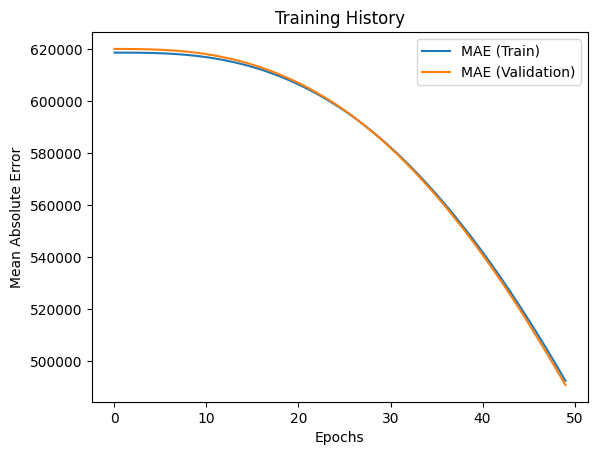

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("house_price.csv")

# Select features and target variable
features = df[["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Year_Built", "Lot_Size", "Garage_Size", "Neighborhood_Quality"]]
target = df["House_Price"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Regression Model
reg_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])
reg_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = reg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Evaluate the model
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Regression Model - MSE: {mse}, MAE: {mae}, R²: {r2}")

# Plot training history
plt.plot(history.history['mae'], label='MAE (Train)')
plt.plot(history.history['val_mae'], label='MAE (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()
